# Extract and Clean Los Angeles Census Data

**Instructions:**

1.Provide the file path to the data, the state FIPS code, the county FIPS code, and the 5 digit combined FIPS codes in the second code cell. 

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

import altair as alt
from vega_datasets import data

# Allow altair to visualize large datasets
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
state_fips = '06' # CA FIPS
county_fips = {'037', '059'}  # 037 Los Angeles County, 059 Orange County
fips = ['06037','06059']
path = '/Volumes/Data_01/census/safegraph_open_census_data/data/cbg_b01.csv'

Load file cbg_b01.csv from the SafeGraph Census data. 

The file contains data about population size and statistics related to race. 




| Column Name  | Description     |
| --------- | ------------------------------------------------------------ |
| B01003e1  | TOTAL POPULATION: Total: Total population  -- (Estimate)     |
| B01003m1  | TOTAL POPULATION: Total: Total population -- (Margin of Error) |
| B02001e1  | RACE: Total: Total population -- (Estimate)                  |
| B02001e10 | RACE: Two or more races: Two races excluding Some other race, and three  or more races: Total population -- (Estimate) |
| B02001e2  | RACE: White alone: Total population -- (Estimate)            |
| B02001e3  | RACE: Black or African American alone: Total population -- (Estimate) |
| B02001e4  | RACE: American Indian and Alaska Native alone: Total population --  (Estimate) |
| B02001e5  | RACE: Asian alone: Total population -- (Estimate)            |
| B02001e6  | RACE: Native Hawaiian and Other Pacific Islander alone: Total population  -- (Estimate) |
| B02001e7  | RACE: Some other race alone: Total population -- (Estimate)  |
| B02001e8  | RACE: Two or more races: Total population -- (Estimate)      |
| B02001e9  | RACE: Two or more races: Two races including Some other race: Total  population -- (Estimate) |
| B02001m1  | RACE: Total: Total population -- (Margin of Error)           |
| B02001m10 | RACE: Two or more races: Two races excluding Some other race, and three  or more races: Total population -- (Margin of Error) |
| B02001m2  | RACE: White alone: Total population -- (Margin of Error)     |
| B02001m3  | RACE: Black or African American alone: Total population -- (Margin of  Error) |
| B02001m4  | RACE: American Indian and Alaska Native alone: Total population --  (Margin of Error) |
| B02001m5  | RACE: Asian alone: Total population -- (Margin of Error)     |
| B02001m6  | RACE: Native Hawaiian and Other Pacific Islander alone: Total population  -- (Margin of Error) |
| B02001m7  | RACE: Some other race alone: Total population -- (Margin of Error) |
| B02001m8  | RACE: Two or more races: Total population -- (Margin of Error) |
| B02001m9  | RACE: Two or more races: Two races including Some other race: Total  population -- (Margin of Error) |
| B02008e1  | WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: White  alone or in combination with one or more other races -- (Estimate) |
| B02008m1  | WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: White  alone or in combination with one or more other races -- (Margin of Error) |
| B02009e1  | BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER  RACES: Total: Black or African American alone or in combination with one or  more other races -- (Estimate) |
| B02009m1  | BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER  RACES: Total: Black or African American alone or in combination with one or  more other races -- (Margin of Error) |
| B02010e1  | AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR  MORE OTHER RACES: Total: People who are American Indian or Alaska Native  alone or in combination with one or more other races -- (Estimate) |
| B02010m1  | AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR  MORE OTHER RACES: Total: People who are American Indian or Alaska Native  alone or in combination with one or more other races -- (Margin of Error) |
| B02011e1  | ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: Asian  alone or in combination with one or more other races -- (Estimate) |
| B02011m1  | ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: Asian  alone or in combination with one or more other races -- (Margin of Error) |
| B02012e1  | NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH  ONE OR MORE OTHER RACES: Total: Native Hawaiian and Other Pacific Islander  alone or in combination with one or more other races -- (Estimate) |
| B02012m1  | NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH  ONE OR MORE OTHER RACES: Total: Native Hawaiian and Other Pacific Islander  alone or in combination with one or more other races -- (Margin of Error) |
| B02013e1  | SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES:  Total: Some other race alone or in combination with one or more other races  -- (Estimate) |
| B02013m1  | SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES:  Total: Some other race alone or in combination with one or more other races  -- (Margin of Error) |
| B03002e1  | HISPANIC OR LATINO ORIGIN BY RACE: Total: Total population -- (Estimate) |
| B03002e10 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races including Some other race: Total population -- (Estimate) |
| B03002e11 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races excluding Some other race, and three or more races: Total  population -- (Estimate) |
| B03002e12 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Total population  -- (Estimate) |
| B03002e13 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: White alone: Total  population -- (Estimate) |
| B03002e14 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Black or African  American alone: Total population -- (Estimate) |
| B03002e15 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: American Indian  and Alaska Native alone: Total population -- (Estimate) |
| B03002e16 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Asian alone: Total  population -- (Estimate) |
| B03002e17 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Native Hawaiian  and Other Pacific Islander alone: Total population -- (Estimate) |
| B03002e18 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Some other race  alone: Total population -- (Estimate) |
| B03002e19 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Total population -- (Estimate) |
| B03002e2  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Total  population -- (Estimate) |
| B03002e20 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races including Some other race: Total population -- (Estimate) |
| B03002e21 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races excluding Some other race, and three or more races: Total  population -- (Estimate) |
| B03002e3  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: White alone:  Total population -- (Estimate) |
| B03002e4  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Black or  African American alone: Total population -- (Estimate) |
| B03002e5  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: American  Indian and Alaska Native alone: Total population -- (Estimate) |
| B03002e6  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Asian alone:  Total population -- (Estimate) |
| B03002e7  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Native  Hawaiian and Other Pacific Islander alone: Total population -- (Estimate) |
| B03002e8  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Some other  race alone: Total population -- (Estimate) |
| B03002e9  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Total population -- (Estimate) |
| B03002m1  | HISPANIC OR LATINO ORIGIN BY RACE: Total: Total population -- (Margin of  Error) |
| B03002m10 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races including Some other race: Total population -- (Margin of  Error) |
| B03002m11 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races excluding Some other race, and three or more races: Total  population -- (Margin of Error) |
| B03002m12 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Total population  -- (Margin of Error) |
| B03002m13 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: White alone: Total  population -- (Margin of Error) |
| B03002m14 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Black or African  American alone: Total population -- (Margin of Error) |
| B03002m15 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: American Indian  and Alaska Native alone: Total population -- (Margin of Error) |
| B03002m16 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Asian alone: Total  population -- (Margin of Error) |
| B03002m17 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Native Hawaiian  and Other Pacific Islander alone: Total population -- (Margin of Error) |
| B03002m18 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Some other race  alone: Total population -- (Margin of Error) |
| B03002m19 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Total population -- (Margin of Error) |
| B03002m2  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Total  population -- (Margin of Error) |
| B03002m20 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races including Some other race: Total population -- (Margin of Error) |
| B03002m21 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races excluding Some other race, and three or more races: Total  population -- (Margin of Error) |
| B03002m3  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: White alone:  Total population -- (Margin of Error) |
| B03002m4  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Black or  African American alone: Total population -- (Margin of Error) |
| B03002m5  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: American  Indian and Alaska Native alone: Total population -- (Margin of Error) |
| B03002m6  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Asian alone:  Total population -- (Margin of Error) |
| B03002m7  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Native  Hawaiian and Other Pacific Islander alone: Total population -- (Margin of  Error) |
| B03002m8  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Some other  race alone: Total population -- (Margin of Error) |
| B03002m9  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Total population -- (Margin of Error) |
| B03003e1  | HISPANIC OR LATINO ORIGIN: Total: Total population -- (Estimate) |
| B03003e2  | HISPANIC OR LATINO ORIGIN: Not Hispanic or Latino: Total population --  (Estimate) |
| B03003e3  | HISPANIC OR LATINO ORIGIN: Hispanic or Latino: Total population --  (Estimate) |
| B03003m1  | HISPANIC OR LATINO ORIGIN: Total: Total population -- (Margin of Error) |
| B03003m2  | HISPANIC OR LATINO ORIGIN: Not Hispanic or Latino: Total population --  (Margin of Error) |
| B03003m3  | HISPANIC OR LATINO ORIGIN: Hispanic or Latino: Total population --  (Margin of Error) |

Load File with total population for our census block groups.

In [3]:
# Read file
df = pd.read_csv(path, dtype={'census_block_group': object})
df

,census_block_group,B01001e1,B01001m1,B01001e2,B01001m2,B01001e3,B01001m3,B01001e4,B01001m4,B01001e5,...,B01002He3,B01002Hm3,B01002Ie1,B01002Im1,B01002Ie2,B01002Im2,B01002Ie3,B01002Im3,B01003e1,B01003m1
0,010010201001,745,226,356,121,33,32,46,39,4,...,33.6,5.9,NaN,NaN,NaN,NaN,NaN,NaN,745,226
1,010010201002,1265,232,639,139,3,6,6,9,53,...,45.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,1265,232
2,010010202001,960,261,534,176,0,11,82,71,90,...,37.2,9.2,NaN,NaN,NaN,NaN,NaN,NaN,960,261
3,010010202002,1236,227,634,136,28,21,47,39,33,...,42.9,2.4,NaN,NaN,NaN,NaN,NaN,NaN,1236,227
4,010010203001,2364,378,1125,229,20,24,166,92,92,...,37.9,9.1,27.2,20.1,27.1,25.7,28.1,15.6,2364,378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,332,460,171,43,65,0,13,0,...,NaN,NaN,57.5,33.1,58.8,10.1,37.3,29.6,921,332
220329,721537506012,2703,531,1353,352,142,112,62,63,62,...,NaN,NaN,34.2,7.7,25.4,12.6,38.6,7.6,2703,531
220330,721537506013,1195,425,583,222,0,13,67,75,103,...,NaN,NaN,25.9,4.0,22.4,6.6,40.5,22.8,1195,425
220331,721537506021,2005,471,926,251,68,49,54,40,107,...,NaN,NaN,46.3,8.1,39.4,15.2,50.3,7.7,2005,471


Extract all census block groups needed.

In [4]:
# Function to filter out FIPS
def filter_fips(df, fips=fips):
    return df[df['census_block_group'].astype(str).str[:5].isin(fips)]

In [5]:
# Filter out CBGs
df = filter_fips(df)
df

,census_block_group,B01001e1,B01001m1,B01001e2,B01001m2,B01001e3,B01001m3,B01001e4,B01001m4,B01001e5,...,B01002He3,B01002Hm3,B01002Ie1,B01002Im1,B01002Ie2,B01002Im2,B01002Ie3,B01002Im3,B01003e1,B01003m1
13843,060371011101,1785,433,906,210,84,71,47,45,61,...,37.8,9.2,43.2,18.5,43.4,21.4,40.8,33.7,1785,433
13844,060371011102,1770,370,805,166,7,11,54,43,119,...,43.8,11.9,24.4,4.8,24.7,8.0,24.4,5.8,1770,370
13845,060371011103,1112,282,563,168,41,49,8,14,30,...,52.9,17.4,35.5,4.1,35.5,7.6,34.5,15.4,1112,282
13846,060371011221,2169,380,1100,187,37,35,22,37,45,...,52.8,7.4,40.4,7.1,48.3,16.4,33.4,19.4,2169,380
13847,060371011222,1132,272,506,173,0,12,34,40,12,...,52.4,1.9,37.5,17.4,45.0,23.3,21.5,40.9,1132,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23024,060591106071,789,260,437,173,0,12,0,12,23,...,70.1,11.3,32.1,21.6,22.1,9.8,34.4,35.1,789,260
23025,060591106072,1700,386,854,225,107,65,25,38,70,...,48.3,39.7,24.5,2.8,24.2,6.6,38.1,19.1,1700,386
23026,060591106073,1744,289,777,161,96,71,41,26,43,...,40.9,12.1,38.1,20.5,37.9,26.3,38.2,21.2,1744,289
23027,060599800001,25,14,15,19,0,12,0,12,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,14


In [6]:
'We have {} Census Block Groups'.format(len(df.index))

'We have 8248 Census Block Groups'

Extract the total population for each census block group, which is under column B01003e1.

In [7]:
# Select column
df = df[['census_block_group','B01003e1']]
df = df.rename(columns={'census_block_group':'cbg', 'B01003e1':'pop_total'})
df = df.set_index('cbg')
df = df
df

,pop_total
cbg,
060371011101,1785
060371011102,1770
060371011103,1112
060371011221,2169
060371011222,1132
...,...
060591106071,789
060591106072,1700
060591106073,1744


In [8]:
alt.Chart(df, title='Los Angeles CBG Population Histogram').mark_bar().encode(
    x=alt.X('pop_total:Q', bin=alt.Bin(maxbins=20), title='Total CBG Population'),
    y="count()"
).interactive()

alt.Chart(...)

![la-pop-hist](https://github.com/chouhandiksha/bigdataproject/raw/main/media/dem/la-pop-hist.png)

Load the file with the race stats

In [9]:
# Read file
df = pd.read_csv('/Volumes/Data_01/census/safegraph_open_census_data/data/cbg_b02.csv', dtype={'census_block_group': object})
df

,census_block_group,B02001e1,B02001m1,B02001e2,B02001m2,B02001e3,B02001m3,B02001e4,B02001m4,B02001e5,...,C02003e15,C02003m15,C02003e16,C02003m16,C02003e17,C02003m17,C02003e18,C02003m18,C02003e19,C02003m19
0,010010201001,745,226,585,198,160,140,0,11,0,...,0,11,0,11,0,11,0,11,0,11
1,010010201002,1265,232,1083,222,104,75,0,11,9,...,8,14,0,11,21,33,0,11,0,11
2,010010202001,960,261,361,179,568,195,0,11,0,...,18,30,0,11,0,11,0,11,0,11
3,010010202002,1236,227,615,154,571,168,0,11,24,...,0,11,0,11,0,11,0,11,0,11
4,010010203001,2364,378,1481,314,515,197,22,34,27,...,5,10,0,11,56,95,0,11,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,332,752,348,0,13,0,13,0,...,0,13,0,13,0,13,0,13,0,13
220329,721537506012,2703,531,2230,459,207,175,40,63,0,...,0,13,0,13,26,39,0,13,0,13
220330,721537506013,1195,425,1085,429,25,31,0,13,0,...,0,13,0,13,0,13,0,13,0,13
220331,721537506021,2005,471,1662,463,68,64,0,13,0,...,0,13,0,13,0,13,0,13,0,13


In [10]:
# Filter out CBGs
df = filter_fips(df)
df

,census_block_group,B02001e1,B02001m1,B02001e2,B02001m2,B02001e3,B02001m3,B02001e4,B02001m4,B02001e5,...,C02003e15,C02003m15,C02003e16,C02003m16,C02003e17,C02003m17,C02003e18,C02003m18,C02003e19,C02003m19
13843,060371011101,1785,433,1473,392,7,13,0,12,51,...,0,12,0,12,8,14,0,12,0,12
13844,060371011102,1770,370,975,254,39,41,0,12,120,...,27,27,0,12,9,15,0,12,0,12
13845,060371011103,1112,282,896,251,8,13,0,12,136,...,0,12,0,12,0,12,0,12,0,12
13846,060371011221,2169,380,1746,305,0,12,18,22,154,...,0,12,0,12,43,64,0,12,0,12
13847,060371011222,1132,272,938,263,0,12,0,12,169,...,0,12,0,12,0,12,0,12,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23024,060591106071,789,260,512,230,17,20,13,19,200,...,20,32,0,12,27,44,0,12,0,12
23025,060591106072,1700,386,721,271,0,12,62,64,837,...,0,12,0,12,16,27,0,12,0,12
23026,060591106073,1744,289,673,211,24,39,10,16,978,...,22,29,0,12,6,10,0,12,0,12
23027,060599800001,25,14,18,16,0,12,0,12,7,...,0,12,0,12,0,12,0,12,0,12


In [11]:
# Get white only population
df = df[['census_block_group','B02001e1','B02001e2']]
df = df.rename(columns={'census_block_group':'cbg','B02001e1':'pop_total','B02001e2':'pop_whiteonly' })
df = df.set_index('cbg')
df

,pop_total,pop_whiteonly
cbg,,
060371011101,1785,1473
060371011102,1770,975
060371011103,1112,896
060371011221,2169,1746
060371011222,1132,938
...,...,...
060591106071,789,512
060591106072,1700,721
060591106073,1744,673


In [12]:
# Calculate percentage
df['perc_whiteonly']= df.apply(lambda row: row['pop_whiteonly']/row['pop_total']*100 if row['pop_total']!=0 else 0, axis=1)
df

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
060371011101,1785,1473,82.521008
060371011102,1770,975,55.084746
060371011103,1112,896,80.575540
060371011221,2169,1746,80.497925
060371011222,1132,938,82.862191
...,...,...,...
060591106071,789,512,64.892269
060591106072,1700,721,42.411765
060591106073,1744,673,38.589450


In [13]:
# Get top 3 CBG with highest whiteonly percentage
df.nlargest(3, 'perc_whiteonly')

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
060371239012,404,404,100.0
060371374022,1685,1685,100.0
060371390013,587,587,100.0


In [14]:
# Get top 3 CBG with lowest whiteonly percentage
df.nsmallest(3, 'perc_whiteonly')

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
060372325004,728,0,0.0
060372343002,1002,0,0.0
060372380002,452,0,0.0


In [15]:
# unique variable for join later
race_df = df 
race_df

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
060371011101,1785,1473,82.521008
060371011102,1770,975,55.084746
060371011103,1112,896,80.575540
060371011221,2169,1746,80.497925
060371011222,1132,938,82.862191
...,...,...,...
060591106071,789,512,64.892269
060591106072,1700,721,42.411765
060591106073,1744,673,38.589450


In [16]:
alt.Chart(race_df, title='Los Angeles CBG Percentage White Only Histogram').mark_bar().encode(
    x=alt.X('perc_whiteonly:Q', bin=alt.Bin(maxbins=20), title='CBG Percentage White Only'),
    y="count()"
).interactive()

alt.Chart(...)

![la-wh-hist](https://github.com/chouhandiksha/bigdataproject/raw/main/media/dem/la-wh-hist.png)

# Get Poverty Stats


| Column Name | Description |
| -------- | ------------------------------------------------------------ |
| C17002e1 | RATIO OF INCOME TO POVERTY LEVEL IN THE  PAST 12 MONTHS: Total: Population for whom poverty status is determined --  (Estimate) |
| C17002e2 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: Under .50:  Population for whom poverty status is determined -- (Estimate) |
| C17002e3 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: .50 to .99:  Population for whom poverty status is determined -- (Estimate) |
| C17002e4 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.00 to 1.24:  Population for whom poverty status is determined -- (Estimate) |
| C17002e5 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.25 to 1.49:  Population for whom poverty status is determined -- (Estimate) |
| C17002e6 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.50 to 1.84:  Population for whom poverty status is determined -- (Estimate) |
| C17002e7 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.85 to 1.99:  Population for whom poverty status is determined -- (Estimate) |
| C17002e8 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 2.00 and over:  Population for whom poverty status is determined -- (Estimate) |






In [17]:
# Read file 
df = pd.read_csv('/Volumes/Data_01/census/safegraph_open_census_data/data/cbg_c17.csv', dtype={'census_block_group': object})
df

,census_block_group,C17002e1,C17002m1,C17002e2,C17002m2,C17002e3,C17002m3,C17002e4,C17002m4,C17002e5,...,B17021e31,B17021m31,B17021e32,B17021m32,B17021e33,B17021m33,B17021e34,B17021m34,B17021e35,B17021m35
0,010010201001,745,226,47,58,96,93,49,36,76,...,88,42,66,37,56,35,10,12,22,27
1,010010201002,1265,232,8,10,48,76,31,50,29,...,64,36,58,32,50,30,8,11,6,9
2,010010202001,955,259,122,155,243,118,20,19,16,...,72,38,62,33,62,33,0,11,10,14
3,010010202002,1059,214,53,47,65,68,61,50,87,...,145,51,138,50,132,51,6,9,7,10
4,010010203001,2364,378,23,32,77,75,74,86,117,...,268,99,249,90,213,88,36,35,19,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,332,462,279,160,119,85,107,35,...,74,58,74,58,74,58,0,13,0,13
220329,721537506012,2703,531,648,332,530,292,122,161,95,...,66,50,66,50,66,50,0,13,0,13
220330,721537506013,1195,425,15,26,277,254,48,76,90,...,19,21,19,21,19,21,0,13,0,13
220331,721537506021,1990,466,862,397,583,248,99,115,136,...,30,28,30,28,30,28,0,13,0,13


In [18]:
# Filter out CBGs
df = filter_fips(df)
df

,census_block_group,C17002e1,C17002m1,C17002e2,C17002m2,C17002e3,C17002m3,C17002e4,C17002m4,C17002e5,...,B17021e31,B17021m31,B17021e32,B17021m32,B17021e33,B17021m33,B17021e34,B17021m34,B17021e35,B17021m35
13843,060371011101,1785,433,202,196,176,158,136,155,119,...,148,69,140,65,106,62,34,27,8,13
13844,060371011102,1660,325,31,48,90,51,410,279,40,...,226,126,152,76,136,76,16,18,74,101
13845,060371011103,1112,282,9,15,124,132,10,17,0,...,104,55,93,49,83,49,10,17,11,17
13846,060371011221,2161,379,90,57,32,34,0,12,0,...,146,58,146,58,133,59,13,16,0,12
13847,060371011222,1132,272,13,21,0,12,93,131,74,...,192,119,132,65,83,49,49,49,60,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23024,060591106071,789,260,131,81,24,27,0,12,4,...,28,34,17,20,8,13,9,14,11,17
23025,060591106072,1646,371,43,44,8,13,79,86,1,...,220,214,112,71,71,43,41,60,108,153
23026,060591106073,1744,289,78,90,70,111,90,100,0,...,201,104,163,71,119,61,44,46,38,45
23027,060599800001,0,12,0,12,0,12,0,12,0,...,0,12,0,12,0,12,0,12,0,12


In [19]:
# Select columns
df = df[['census_block_group', 'C17002e1', 'C17002e2', 'C17002e3']]
df = df.rename(columns={'census_block_group':'cbg', 'C17002e1':'pov_pop_all'})
df = df.set_index('cbg')
df

,pov_pop_all,C17002e2,C17002e3
cbg,,,
060371011101,1785,202,176
060371011102,1660,31,90
060371011103,1112,9,124
060371011221,2161,90,32
060371011222,1132,13,0
...,...,...,...
060591106071,789,131,24
060591106072,1646,43,8
060591106073,1744,78,70


In [20]:
# Add row values together
df['pop_poverty'] = df.apply(lambda row: row['C17002e2']+row['C17002e3'], axis=1)
df

,pov_pop_all,C17002e2,C17002e3,pop_poverty
cbg,,,,
060371011101,1785,202,176,378
060371011102,1660,31,90,121
060371011103,1112,9,124,133
060371011221,2161,90,32,122
060371011222,1132,13,0,13
...,...,...,...,...
060591106071,789,131,24,155
060591106072,1646,43,8,51
060591106073,1744,78,70,148


In [21]:
# Calculate percentage
df['poverty_percentage'] = df.apply(lambda row: row['pop_poverty']/row['pov_pop_all']*100 if row['pov_pop_all'] != 0 else 0, axis=1)
df

,pov_pop_all,C17002e2,C17002e3,pop_poverty,poverty_percentage
cbg,,,,,
060371011101,1785,202,176,378,21.176471
060371011102,1660,31,90,121,7.289157
060371011103,1112,9,124,133,11.960432
060371011221,2161,90,32,122,5.645534
060371011222,1132,13,0,13,1.148410
...,...,...,...,...,...
060591106071,789,131,24,155,19.645120
060591106072,1646,43,8,51,3.098420
060591106073,1744,78,70,148,8.486239


In [22]:
# Select Column
df = df[['poverty_percentage']]
df

,poverty_percentage
cbg,
060371011101,21.176471
060371011102,7.289157
060371011103,11.960432
060371011221,5.645534
060371011222,1.148410
...,...
060591106071,19.645120
060591106072,3.098420
060591106073,8.486239


In [23]:
# Preview largest
df.nlargest(3, 'poverty_percentage')

,poverty_percentage
cbg,
060372227001,88.469602
060372247001,87.872225
060372426002,87.155963


In [24]:
# Preview smallest
df.nsmallest(3, 'poverty_percentage')

,poverty_percentage
cbg,
060371013002,0.0
060371066041,0.0
060371247001,0.0


In [25]:
pov_df = df

In [26]:
alt.Chart(pov_df, title='Los Angeles CBG Percentage of Population in Poverty Histogram').mark_bar().encode(
    x=alt.X('poverty_percentage:Q', bin=alt.Bin(maxbins=20), title='CBG Percentage of Population in Poverity'),
    y="count()"
).interactive()

alt.Chart(...)

![la-pov-hist](https://github.com/chouhandiksha/bigdataproject/raw/main/media/dem/la-pov-hist.png)

In [ ]:
# Read geojson for ALL US
# WARNING TAKES A LONG TIME
gdf = geopandas.read_file(
        '/Users/justinsnider/nyu-big-data/project/data/census/safegraph_open_census_data/geometry/cbg.geojson')
gdf

In [25]:
# Filter by state FIPS
gdf = gdf[gdf.apply(lambda r: True if r['StateFIPS']==state_fips else False, axis=1)]
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
10297,06,025,940000,3,060259400003,CA,Imperial County,H1,"MULTIPOLYGON (((-114.72653 32.71824, -114.7263..."
10298,06,025,010800,2,060250108002,CA,Imperial County,H1,"MULTIPOLYGON (((-115.43082 32.73090, -115.4308..."
10299,06,025,010800,1,060250108001,CA,Imperial County,H1,"MULTIPOLYGON (((-115.45784 32.90895, -115.4577..."
10300,06,025,011100,3,060250111003,CA,Imperial County,H1,"MULTIPOLYGON (((-115.70134 32.79085, -115.7009..."
10301,06,073,010013,2,060730100132,CA,San Diego County,H1,"MULTIPOLYGON (((-117.05430 32.55542, -117.0543..."
...,...,...,...,...,...,...,...,...,...
33504,06,037,603302,1,060376033021,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043..."
33505,06,037,603302,2,060376033022,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086..."
33506,06,037,603302,3,060376033023,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134..."
33507,06,037,603400,1,060376034001,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31348 33.89941, -118.3134..."


In [26]:
# Filter by county FIPS
gdf = gdf[gdf.apply(lambda r: True if r['CountyFIPS'] in county_fips else False, axis=1)]
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
10302,06,037,310400,3,060373104003,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.35037 34.20667, -118.3499..."
10306,06,059,086502,3,060590865023,CA,Orange County,H1,"MULTIPOLYGON (((-117.91372 33.84724, -117.9135..."
10307,06,037,651002,4,060376510024,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.32800 33.80984, -118.3277..."
10308,06,037,651101,1,060376511011,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.34007 33.82307, -118.3400..."
10309,06,059,099402,3,060590994023,CA,Orange County,H1,"MULTIPOLYGON (((-118.00659 33.71548, -118.0052..."
...,...,...,...,...,...,...,...,...,...
33504,06,037,603302,1,060376033021,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043..."
33505,06,037,603302,2,060376033022,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086..."
33506,06,037,603302,3,060376033023,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134..."
33507,06,037,603400,1,060376034001,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31348 33.89941, -118.3134..."


In [27]:
# Write filtered geojson file to disc
gdf.to_file('/Users/justinsnider/nyu-big-data/project/clean-data/la/la.geojson', driver='GeoJSON')

In [28]:
# Read geojson file
gdf = geopandas.read_file(
        '/Users/justinsnider/nyu-big-data/project/clean-data/la/la.geojson')
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
0,06,037,310400,3,060373104003,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.35037 34.20667, -118.3499..."
1,06,059,086502,3,060590865023,CA,Orange County,H1,"MULTIPOLYGON (((-117.91372 33.84724, -117.9135..."
2,06,037,651002,4,060376510024,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.32800 33.80984, -118.3277..."
3,06,037,651101,1,060376511011,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.34007 33.82307, -118.3400..."
4,06,059,099402,3,060590994023,CA,Orange County,H1,"MULTIPOLYGON (((-118.00659 33.71548, -118.0052..."
...,...,...,...,...,...,...,...,...,...
8243,06,037,603302,1,060376033021,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043..."
8244,06,037,603302,2,060376033022,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086..."
8245,06,037,603302,3,060376033023,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134..."
8246,06,037,603400,1,060376034001,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31348 33.89941, -118.3134..."


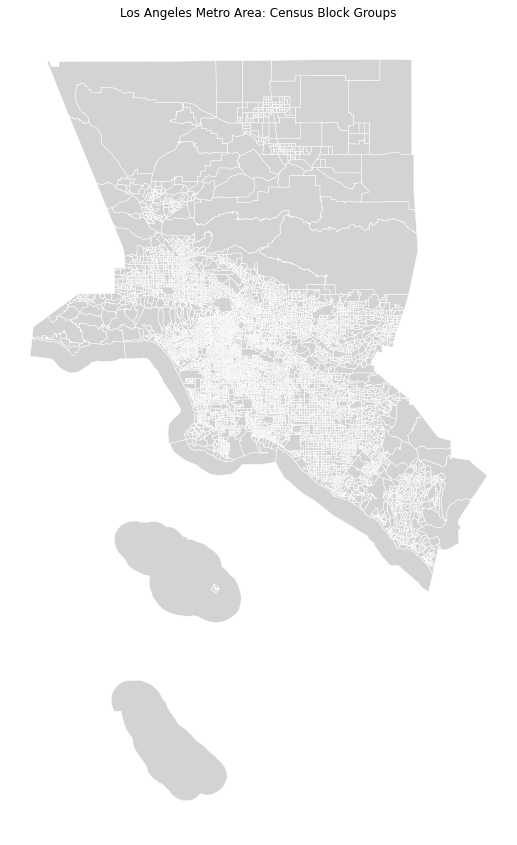

In [29]:
# Preview map
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: Census Block Groups')
ax.axis('off')
gdf.plot(ax=ax, facecolor="lightgray", edgecolor="white", lw=0.5);

In [30]:
# simplify column name
gdf = gdf.rename(columns={'CensusBlockGroup':'cbg'})
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,cbg,State,County,ClassCode,geometry
0,06,037,310400,3,060373104003,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.35037 34.20667, -118.3499..."
1,06,059,086502,3,060590865023,CA,Orange County,H1,"MULTIPOLYGON (((-117.91372 33.84724, -117.9135..."
2,06,037,651002,4,060376510024,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.32800 33.80984, -118.3277..."
3,06,037,651101,1,060376511011,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.34007 33.82307, -118.3400..."
4,06,059,099402,3,060590994023,CA,Orange County,H1,"MULTIPOLYGON (((-118.00659 33.71548, -118.0052..."
...,...,...,...,...,...,...,...,...,...
8243,06,037,603302,1,060376033021,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043..."
8244,06,037,603302,2,060376033022,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086..."
8245,06,037,603302,3,060376033023,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134..."
8246,06,037,603400,1,060376034001,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31348 33.89941, -118.3134..."


In [31]:
# Verify column datatype
gdf['cbg'].dtype

dtype('O')

In [32]:
# # Change column datatype
# gdf = gdf.astype({'cbg':'int64'})
# gdf

In [33]:
# # Verify datatype of column
# gdf['cbg'].dtype

In [34]:
# set index for join
gdf = gdf.set_index('cbg')
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry
cbg,,,,,,,,
060373104003,06,037,310400,3,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.35037 34.20667, -118.3499..."
060590865023,06,059,086502,3,CA,Orange County,H1,"MULTIPOLYGON (((-117.91372 33.84724, -117.9135..."
060376510024,06,037,651002,4,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.32800 33.80984, -118.3277..."
060376511011,06,037,651101,1,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.34007 33.82307, -118.3400..."
060590994023,06,059,099402,3,CA,Orange County,H1,"MULTIPOLYGON (((-118.00659 33.71548, -118.0052..."
...,...,...,...,...,...,...,...,...
060376033021,06,037,603302,1,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043..."
060376033022,06,037,603302,2,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086..."
060376033023,06,037,603302,3,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134..."


In [35]:
gdf = gdf.merge(race_df, left_index=True, right_index=True)
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,,,,,,,,,
060373104003,06,037,310400,3,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.35037 34.20667, -118.3499...",1286,894,69.517885
060590865023,06,059,086502,3,CA,Orange County,H1,"MULTIPOLYGON (((-117.91372 33.84724, -117.9135...",2545,2172,85.343811
060376510024,06,037,651002,4,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.32800 33.80984, -118.3277...",1285,546,42.490272
060376511011,06,037,651101,1,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.34007 33.82307, -118.3400...",2708,1373,50.701625
060590994023,06,059,099402,3,CA,Orange County,H1,"MULTIPOLYGON (((-118.00659 33.71548, -118.0052...",672,259,38.541667
...,...,...,...,...,...,...,...,...,...,...,...
060376033021,06,037,603302,1,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043...",1098,392,35.701275
060376033022,06,037,603302,2,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086...",2053,446,21.724306
060376033023,06,037,603302,3,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134...",955,429,44.921466


In [36]:
gdf = gdf.merge(pov_df, left_index=True, right_index=True)
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry,pop_total,pop_whiteonly,perc_whiteonly,poverty_percentage
cbg,,,,,,,,,,,,
060373104003,06,037,310400,3,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.35037 34.20667, -118.3499...",1286,894,69.517885,17.884914
060590865023,06,059,086502,3,CA,Orange County,H1,"MULTIPOLYGON (((-117.91372 33.84724, -117.9135...",2545,2172,85.343811,22.789784
060376510024,06,037,651002,4,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.32800 33.80984, -118.3277...",1285,546,42.490272,0.000000
060376511011,06,037,651101,1,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.34007 33.82307, -118.3400...",2708,1373,50.701625,7.745399
060590994023,06,059,099402,3,CA,Orange County,H1,"MULTIPOLYGON (((-118.00659 33.71548, -118.0052...",672,259,38.541667,12.969283
...,...,...,...,...,...,...,...,...,...,...,...,...
060376033021,06,037,603302,1,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30479 33.88014, -118.3043...",1098,392,35.701275,11.475410
060376033022,06,037,603302,2,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.30914 33.88013, -118.3086...",2053,446,21.724306,20.691358
060376033023,06,037,603302,3,CA,Los Angeles County,H1,"MULTIPOLYGON (((-118.31349 33.88049, -118.3134...",955,429,44.921466,13.015873


In [37]:
# Write filtered geojson file to disc
gdf.to_file('/Users/justinsnider/nyu-big-data/project/clean-data/la/la_census.geojson', driver='GeoJSON')

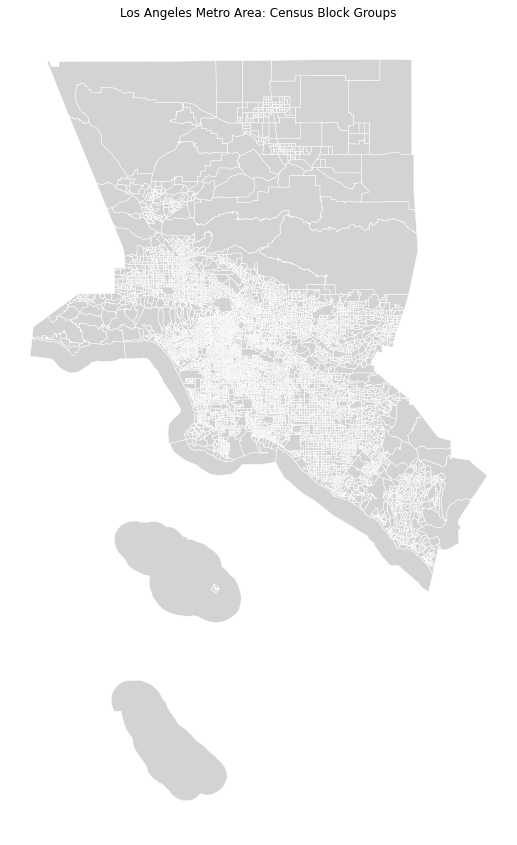

In [38]:
# Preview map
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: Census Block Groups')
ax.axis('off')
gdf.plot(ax=ax, facecolor="lightgray", edgecolor="white", lw=0.5);

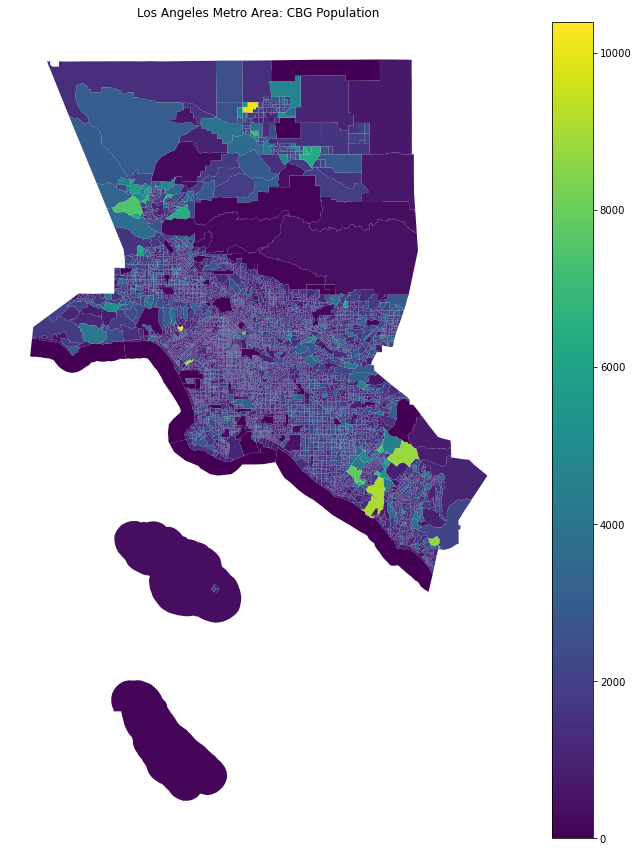

In [39]:
# Plot population size
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: CBG Population')
ax.axis('off')
gdf.plot(column='pop_total', ax=ax, legend=True);

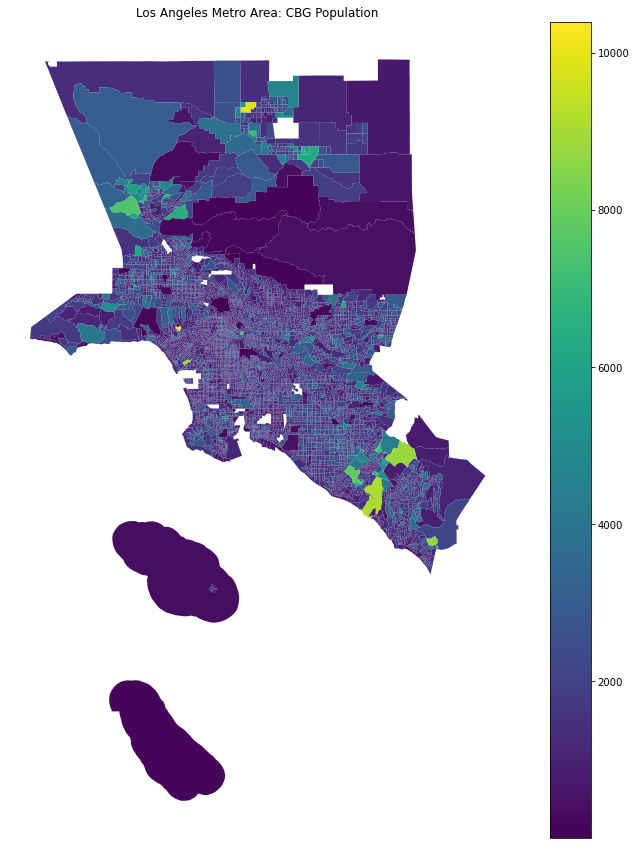

In [40]:
# Pop where not 0
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: CBG Population')
ax.axis('off')
gdf[gdf['pop_total']!=0].plot(column='pop_total', ax=ax, legend=True);

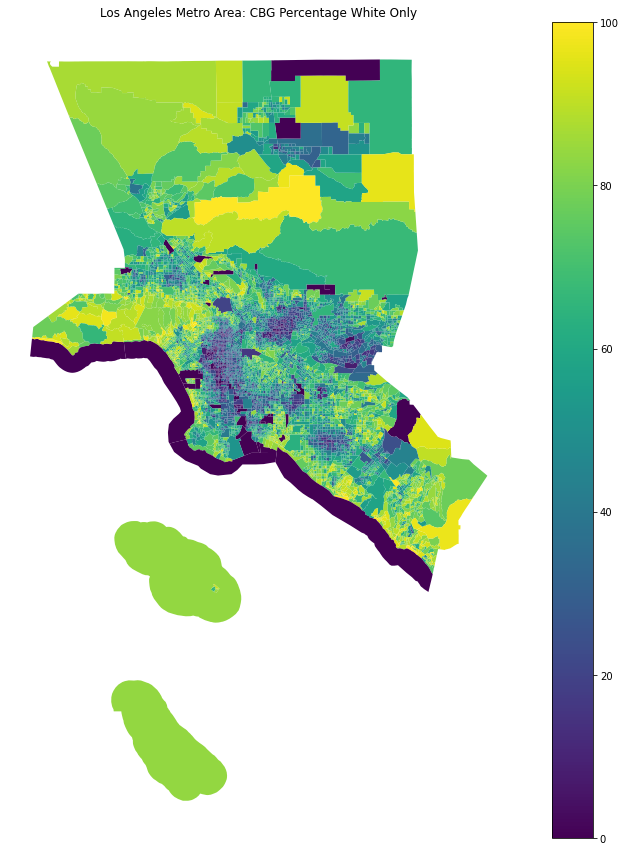

In [41]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: CBG Percentage White Only')
ax.axis('off')
gdf.plot(column='perc_whiteonly', ax=ax, legend=True);

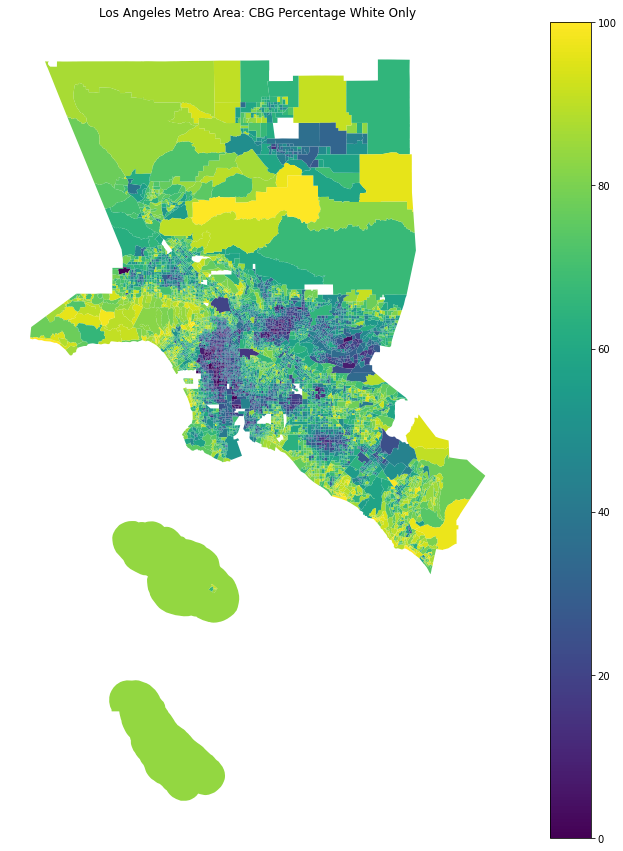

In [42]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: CBG Percentage White Only')
ax.axis('off')
gdf[gdf['pop_total']!=0].plot(column='perc_whiteonly', ax=ax, legend=True);

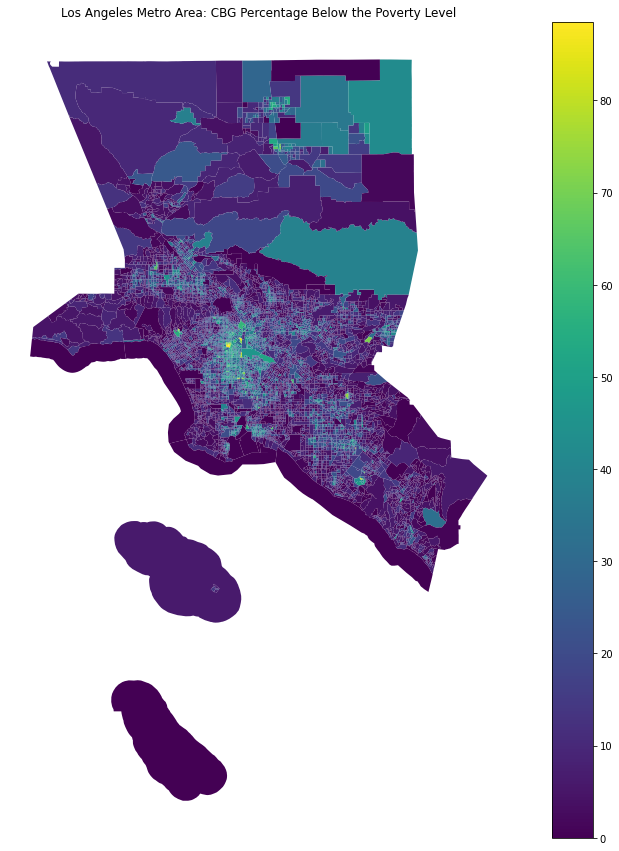

In [43]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: CBG Percentage Below the Poverty Level')
ax.axis('off')
gdf.plot(column='poverty_percentage', ax=ax, legend=True);

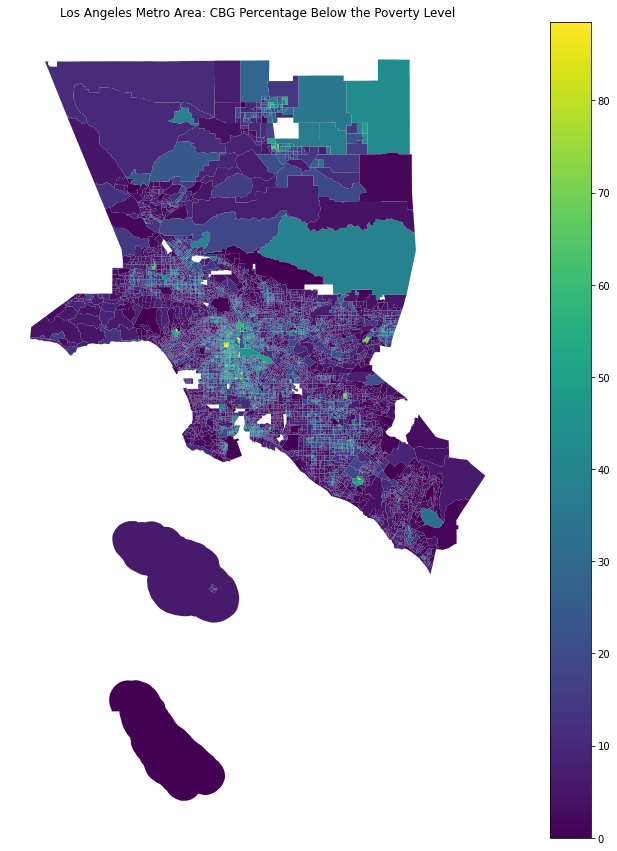

In [44]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Los Angeles Metro Area: CBG Percentage Below the Poverty Level')
ax.axis('off')
gdf[gdf['pop_total']!=0].plot(column='poverty_percentage', ax=ax, legend=True);

In [45]:
# Extract stats to save
stats_df = gdf[['pop_total','poverty_percentage','perc_whiteonly']]
stats_df

,pop_total,poverty_percentage,perc_whiteonly
cbg,,,
060373104003,1286,17.884914,69.517885
060590865023,2545,22.789784,85.343811
060376510024,1285,0.000000,42.490272
060376511011,2708,7.745399,50.701625
060590994023,672,12.969283,38.541667
...,...,...,...
060376033021,1098,11.475410,35.701275
060376033022,2053,20.691358,21.724306
060376033023,955,13.015873,44.921466


In [46]:
if len(set(stats_df.index)) == len(stats_df.index):
    print('Everything is good, every Row has a unique CBG!')
else:
    print('We have a problem, not every row uas a unique CBG.')

Everything is good, every Row has a unique CBG!


In [47]:
for col in stats_df.columns:
    print('\n')
    print(col)
    print('Min: {}\nMax: {}'.format(stats_df[col].min(), stats_df[col].max()))



pop_total
Min: 0
Max: 10384


poverty_percentage
Min: 0.0
Max: 88.46960167714884


perc_whiteonly
Min: 0.0
Max: 100.0


In [48]:
# Print all Null and NaN values
print('We have {} null values.'.format(len(stats_df[stats_df.isna().any(axis=1)])))

We have 0 null values.


In [46]:
# Write stats to disc
filename = '/Users/justinsnider/nyu-big-data/project/clean-data/la/la.csv'
stats_df.to_csv(filename)